In [2]:
import librosa
import librosa.display 
import IPython.display as ipd 
import matplotlib.pyplot as plt
import numpy as np

<div style="direction:rtl"> 
بارگزاری فایل صوتی با کمک librosa
</div>

In [3]:
audio_file = "/home/parsa/Desktop/Speech singnal processing/Ai.wav"

In [4]:
ipd.Audio(audio_file)

In [5]:
signal, sr = librosa.load(audio_file)

In [6]:
signal.size #amount of samples

731472

 ## Extracting MFCCs
<hr/>

In [7]:
mfccs = librosa.feature.mfcc(y = signal, n_mfcc = 13, sr=sr) #n_mfcc is the number of MFCCs to return

In [8]:
mfccs.shape #number of rows is 13 and number of columns (frames) is 1429

(13, 1429)

<div style="direction:rtl"> 
نمایش ضرائب MFCC
   </div> 

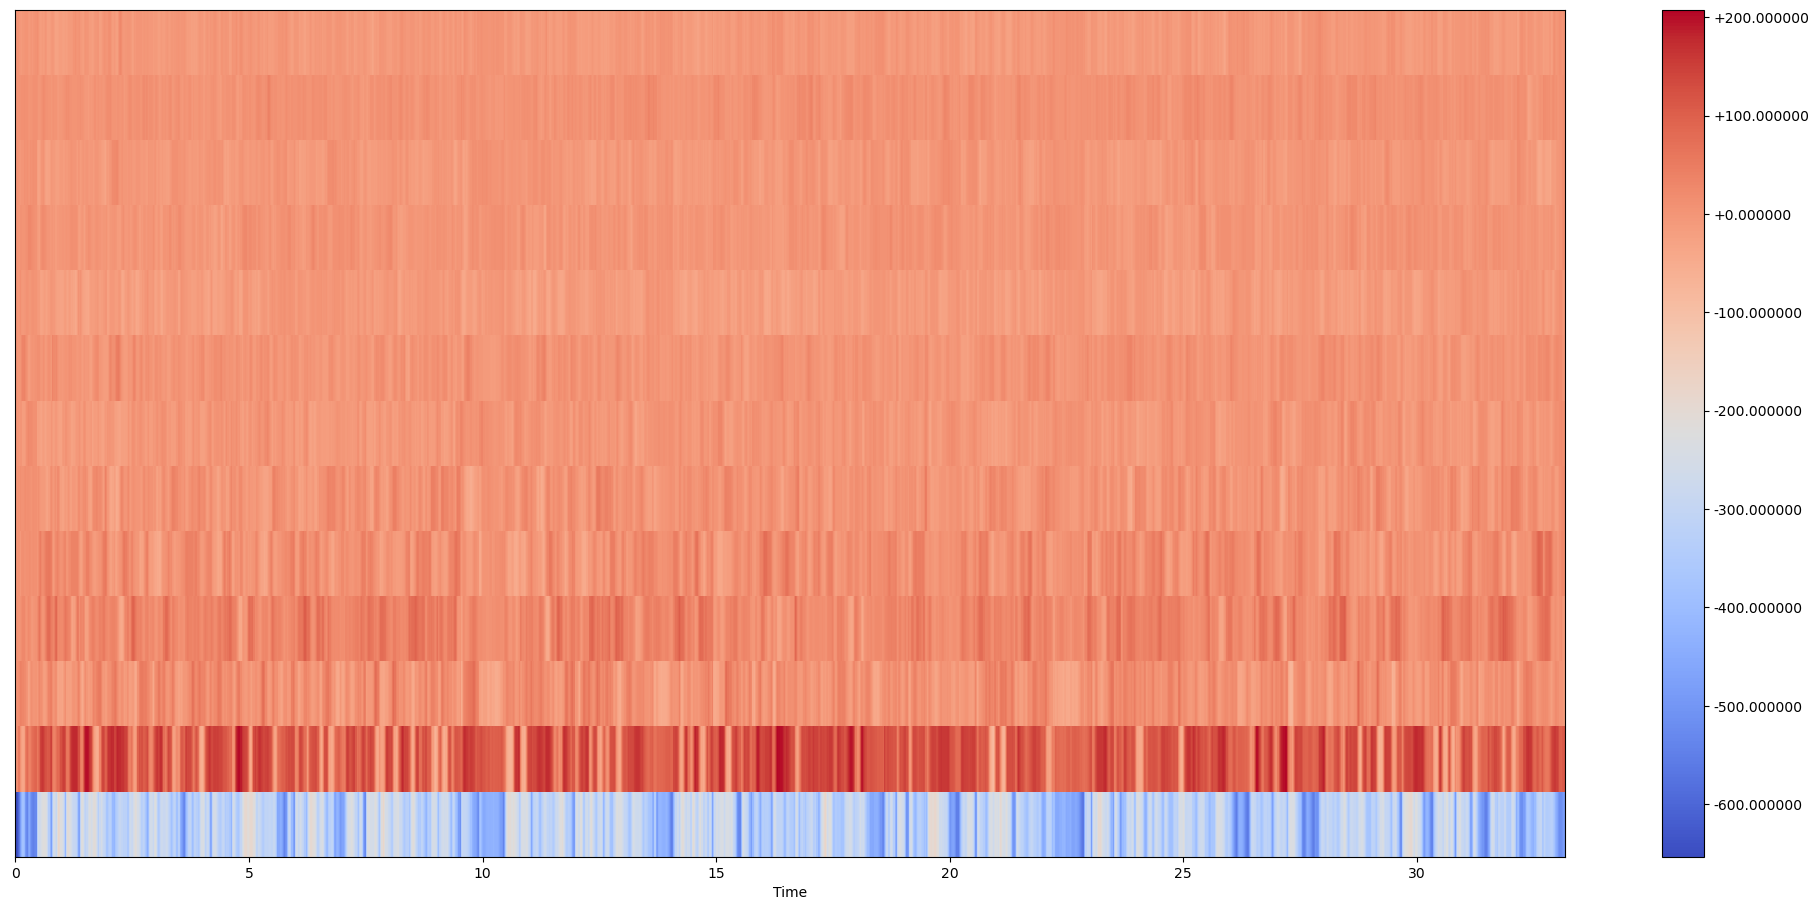

In [9]:
plt.figure(figsize = (25,11))
librosa.display.specshow(mfccs, x_axis="time",sr=sr) #this func enables us to visualize any spectogram like feature
plt.colorbar(format = "%+2f") #map colors to numberic values
plt.show()

<div style="direction:rtl"> 
محاسبه مشتقات ضرائبMFCC
   </div> 

<div style="direction:rtl"> 
برای این کار تنها لازم است که از توابعی که ibrosa در اختیار ما می گذارد استفاده کنیم. اول مشتق اول ضرائب MFCC را حساب کرده ایم و در خط دوم مشتق دوم ضرائب MFCC 
 </div>   

In [10]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order = 2) #second derivative

<div style="direction:rtl"> 
 بدیهی است که این مقدار با mfcc برابر است
 </div>
   

In [11]:
delta_mfccs.shape

(13, 1429)

<div style="direction:rtl"> 
نمایش مشتقات ضرائب MFCC
     </div>

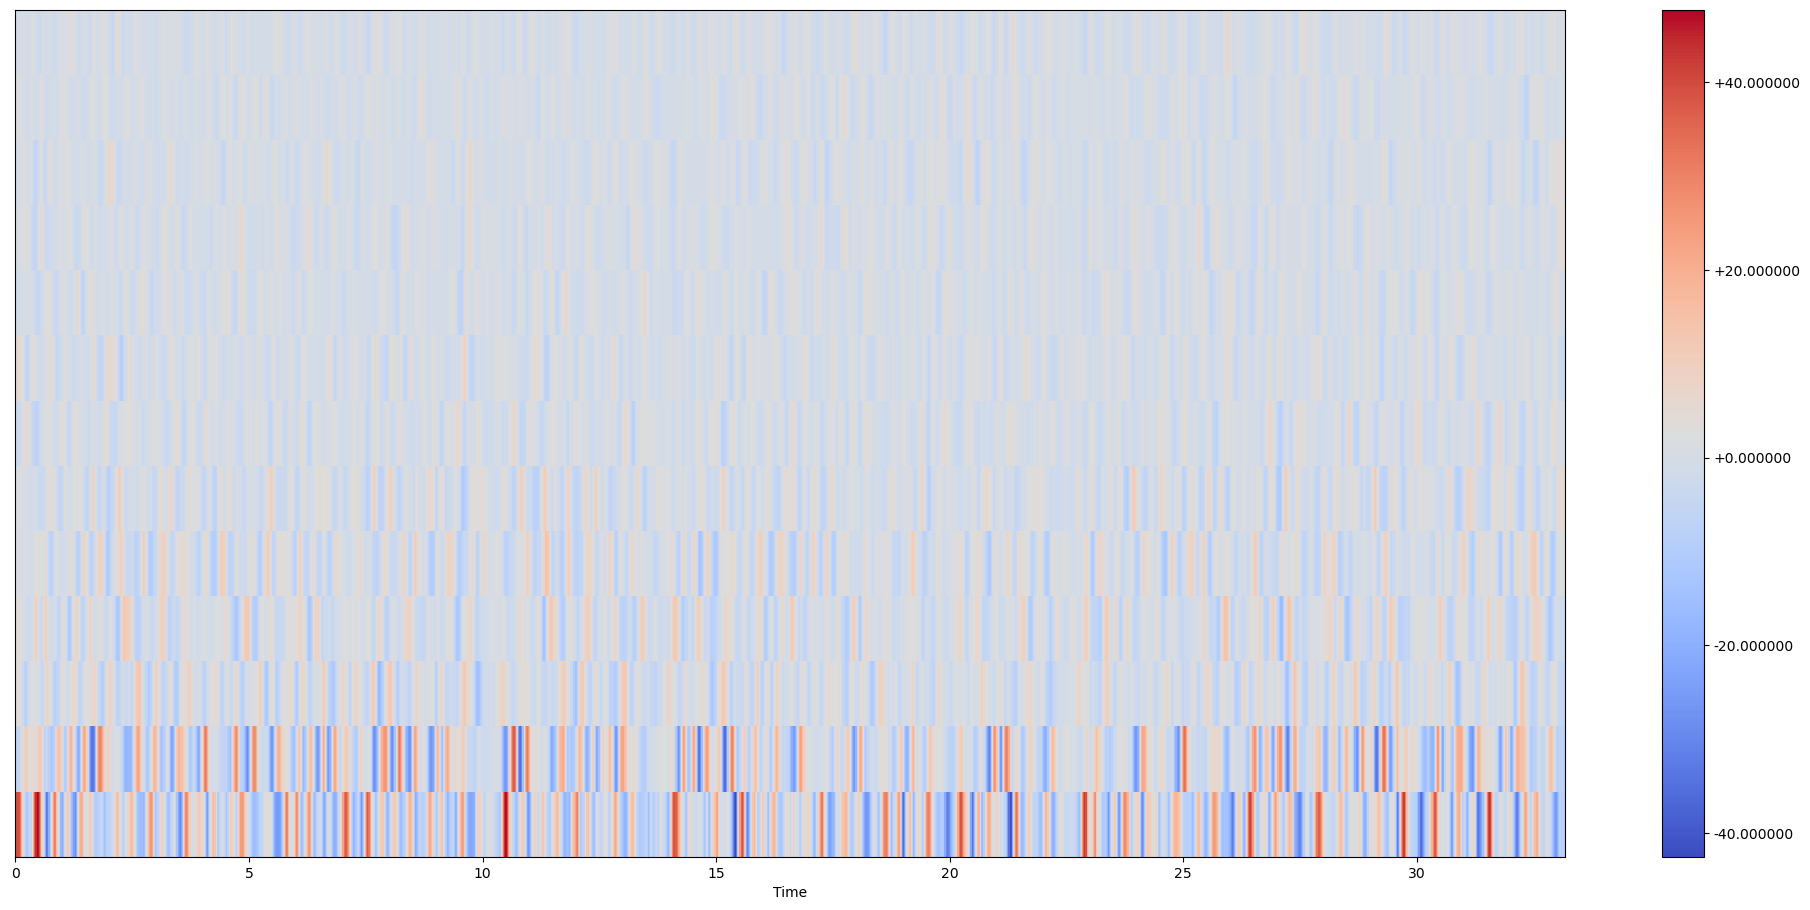

In [12]:
plt.figure(figsize = (25,11))
librosa.display.specshow(delta_mfccs, x_axis="time",sr=sr)
plt.colorbar(format = "%+2f") 
plt.show()

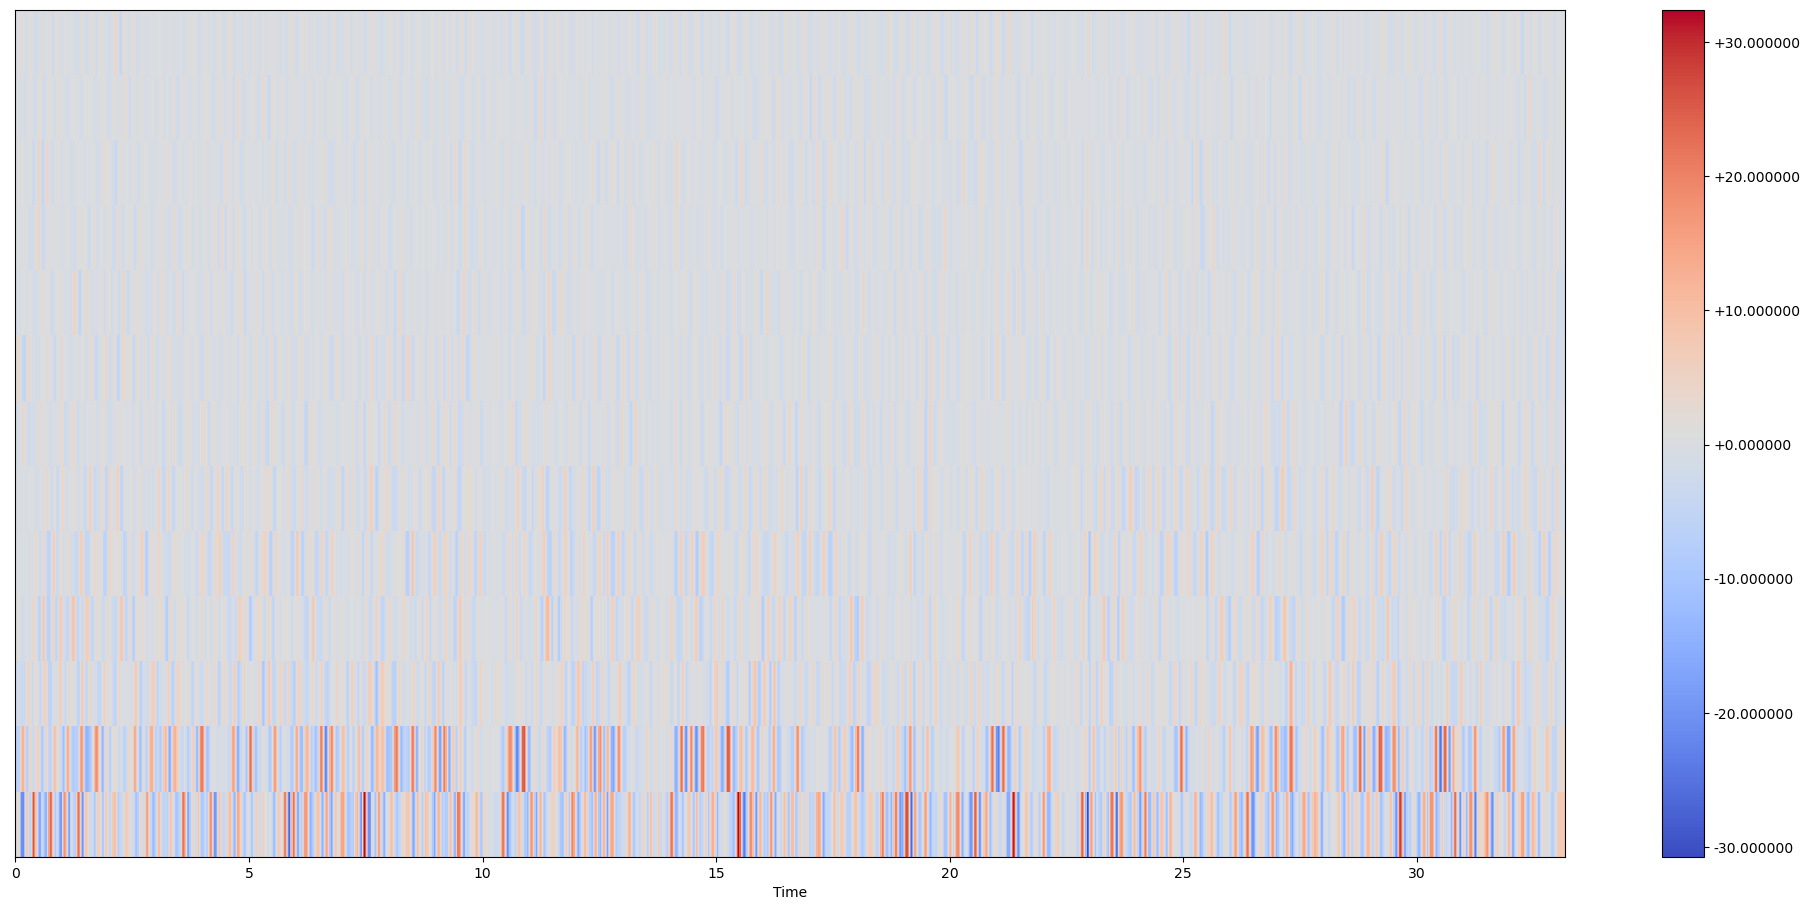

In [14]:
plt.figure(figsize = (25,11))
librosa.display.specshow(delta2_mfccs, x_axis="time",sr=sr)
plt.colorbar(format = "%+2f") 
plt.show()

حال هم اطلاعات مورد نیاز درباره ضرائب MFCC را داریم و همچنین درباره اینکه ضرائب MFCC در طول زمان چگونه تغییر می کنند. می توانیم مقادیرهایمان را با هم ترکیب کنیم. 

In [15]:
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [16]:
comprehensive_mfccs.shape

(39, 1429)